In [1]:
import pandas as pd

In [ ]:
U:\02_Software\Github\Hy2DL_Caravan\data\basin_id\produkt_rr_stunde_20070801_20221231_13674.txt

In [4]:
# Define the file path
file_path = r'U:\02_Software\Github\Hy2DL_Caravan\data\basin_id\produkt_rr_stunde_20070801_20221231_13674.txt'  # Update this with the correct path to your text file

# Read the text file into a pandas DataFrame
df = pd.read_table(file_path, sep=';')

In [6]:
# Remove the 'eor' column, as it's just an end-of-record marker
df = df.drop(columns=['eor'])

# Convert 'MESS_DATUM' to a more readable datetime format
# The MESS_DATUM column has the format YYYYMMDDHH
df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H')

In [8]:
# Handle missing values (e.g., -999) if needed
df = df.replace(-999, None)

# Print the DataFrame to check the result
print(df.head())

   STATIONS_ID          MESS_DATUM  QN_8   R1 RS_IND  WRTR
0        13674 2007-08-01 00:00:00     3  0.0      0  None
1        13674 2007-08-01 01:00:00     3  0.0      0     0
2        13674 2007-08-01 02:00:00     3  0.0      0     0
3        13674 2007-08-01 03:00:00     3  0.0      0  None
4        13674 2007-08-01 04:00:00     3  0.0      0     0


In [10]:
df.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '  R1', 'RS_IND', 'WRTR', 'DATE'], dtype='object')

In [13]:
# Assuming your DataFrame is named 'df'
df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'])  # Ensure MESS_DATUM is in datetime format

# Add a new column for just the date (ignoring time)
df['DATE'] = df['MESS_DATUM'].dt.date

# Group by the date and sum the precipitation values (R1) for each day
# You can also choose the first value for STATIONS_ID if it's the same for all rows
daily_df = df.groupby('DATE').agg({
    'STATIONS_ID': 'first',  # Use 'first' to take the first station ID per day
    '  R1': 'sum'              # Sum up the precipitation values for each day
}).reset_index()

# Optionally, you can rename 'R1' to something like 'Daily_Precipitation' for clarity
daily_df.rename(columns={'  R1': 'Daily_Precipitation'}, inplace=True)

# Print the daily precipitation DataFrame
print(daily_df.head())

         DATE  STATIONS_ID Daily_Precipitation
0  2007-08-01        13674                 0.0
1  2007-08-02        13674                 0.0
2  2007-08-03        13674                 0.0
3  2007-08-04        13674                 0.0
4  2007-08-05        13674                 0.0


In [14]:
# Optionally, save the result to a CSV file
file_path = r'U:\02_Software\Github\Hy2DL_Caravan\data\basin_id\daily_precipitation_dwd.csv'
daily_df.to_csv(file_path, index=False)

In [15]:
testde= pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv')

In [17]:
# Ensure the date columns are in datetime format
testde['date'] = pd.to_datetime(testde['date'])
daily_df['DATE'] = pd.to_datetime(daily_df['DATE'])

# Merge the two dataframes on the date columns
# Use 'left' join to keep all rows from testde and get matching values from lstm_precip
merged_df = pd.merge(testde, daily_df[['DATE', 'Daily_Precipitation']],
                     left_on='date', right_on='DATE', how='left')

# Now 'testde_2' from lstm_precip is copied to the merged_df, but only for matching dates
# Drop the 'Unnamed: 0' column as it's no longer needed
merged_df = merged_df.drop(columns=['DATE'])

# The result is 'merged_df' where 'testde_2' is copied from lstm_precip to testde
print(merged_df.head())

        date  snow_depth_water_equivalent_mean  \
0 1980-01-02                             13.61   
1 1980-01-03                             15.17   
2 1980-01-04                             17.28   
3 1980-01-05                             13.87   
4 1980-01-06                              9.33   

   surface_net_solar_radiation_mean  surface_net_thermal_radiation_mean  \
0                             21.61                              -45.13   
1                             22.91                              -38.98   
2                              8.27                               -9.49   
3                             12.41                               -5.48   
4                             20.89                              -17.88   

   surface_pressure_mean  temperature_2m_mean  dewpoint_temperature_2m_mean  \
0                  98.58                -2.02                         -4.41   
1                  99.41                -3.66                         -6.24   
2          

In [18]:
output_file_path = r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv' # Replace with your desired path
merged_df.to_csv(output_file_path, index=False)

In [2]:
testde= pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_2.csv')

In [6]:
lstm_precip = pd.read_table(r'U:\02_Software\Github\Hy2DL_Caravan\data\y_sim.txt',sep=',')

In [7]:
lstm_precip.columns

Index(['Unnamed: 0', 'testde_1', 'testde_2', 'camelsde_111740',
       'camelsde_111630'],
      dtype='object')

In [8]:
# Ensure the date columns are in datetime format
testde['date'] = pd.to_datetime(testde['date'])
lstm_precip['Unnamed: 0'] = pd.to_datetime(lstm_precip['Unnamed: 0'])

# Merge the two dataframes on the date columns
# Use 'left' join to keep all rows from testde and get matching values from lstm_precip
merged_df = pd.merge(testde, lstm_precip[['Unnamed: 0', 'testde_2']],
                     left_on='date', right_on='Unnamed: 0', how='left')

# Now 'testde_2' from lstm_precip is copied to the merged_df, but only for matching dates
# Drop the 'Unnamed: 0' column as it's no longer needed
merged_df = merged_df.drop(columns=['Unnamed: 0'])

# The result is 'merged_df' where 'testde_2' is copied from lstm_precip to testde
print(merged_df.head())


        date  snow_depth_water_equivalent_mean  \
0 1980-01-02                             13.61   
1 1980-01-03                             15.17   
2 1980-01-04                             17.28   
3 1980-01-05                             13.87   
4 1980-01-06                              9.33   

   surface_net_solar_radiation_mean  surface_net_thermal_radiation_mean  \
0                             21.61                              -45.13   
1                             22.91                              -38.98   
2                              8.27                               -9.49   
3                             12.41                               -5.48   
4                             20.89                              -17.88   

   surface_pressure_mean  temperature_2m_mean  dewpoint_temperature_2m_mean  \
0                  98.58                -2.02                         -4.41   
1                  99.41                -3.66                         -6.24   
2          

In [9]:
output_file_path = r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv' # Replace with your desired path
merged_df.to_csv(output_file_path, index=False)

In [22]:
import pandas as pd

# Define the date range
date_start = '1980-01-01'
date_end = '2020-12-31'

# Read the existing timeseries data
timeseries = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv')

# Convert 'date' column to datetime
timeseries['date'] = pd.to_datetime(timeseries['date'])

# Read evapotranspiration data from CSV files and convert 'date' columns
evap_lstm = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_lstm.csv',header=None)
evap_era5 = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_era5.csv',header=None)
evap_eobs = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_eobs.csv',header=None)
evap_dwd = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_dwd.csv')

In [23]:
evap_dwd

,evap_dwd
0,0.223714
1,0.200547
2,0.220150
3,0.304675
4,0.294072
...,...
14970,0.221645
14971,0.224967
14972,0.230139
14973,0.226662


In [7]:
import pandas as pd

# Define the date range
date_start = '1980-01-01'
date_end = '2020-12-31'

# Read the existing timeseries data
timeseries = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv')

# Convert 'date' column to datetime
timeseries['date'] = pd.to_datetime(timeseries['date'])

# Read evapotranspiration data from CSV files and convert 'date' columns
evap_lstm = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_lstm.csv')
evap_era5 = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_era5.csv')
evap_eobs = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_eobs.csv')

# Create a date range based on the length of the timeseries
date_range = pd.date_range(start=date_start, end=date_end)

# Add date information to each evap DataFrame
evap_lstm['date'] = date_range[:len(evap_lstm)]
evap_era5['date'] = date_range[:len(evap_era5)]
evap_eobs['date'] = date_range[:len(evap_eobs)]

# Merge each evap dataset with the timeseries data based on the 'date' column
timeseries = pd.merge(timeseries, evap_lstm[['date', 'evap_lstm_column']], on='date', how='left')
timeseries = pd.merge(timeseries, evap_era5[['date', 'evap_era5_column']], on='date', how='left')
timeseries = pd.merge(timeseries, evap_eobs[['date', 'evap_eobs_column']], on='date', how='left')

# Save the updated timeseries data to a new CSV file
timeseries.to_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv', index=False)


In [25]:
evap_eobs

,0
0,evap_eobs_column
1,0.1977113837576538
2,0.17723749741295391
3,0.19456205968373103
4,0.26926216539535275
...,...
14971,0.2201067454415287
14972,0.22340514650305554
14973,0.22854170220536024
14974,0.22508855050480542


In [26]:
# Define the date range
date_start = '1980-01-01'
date_end = '2020-12-31'

# Read the existing timeseries data
timeseries = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv')

# Convert 'date' column to datetime
timeseries['date'] = pd.to_datetime(timeseries['date'])

# Read evapotranspiration data from CSV files and convert 'date' columns
evap_dwd = pd.read_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\attributes\testde\evap_dwd.csv')

# Create a date range based on the length of the timeseries
date_range = pd.date_range(start=date_start, end=date_end)

# Add date information to each evap DataFrame
evap_dwd['date'] = date_range[:len(evap_dwd)]

# Merge each evap dataset with the timeseries data based on the 'date' column
timeseries = pd.merge(timeseries, evap_dwd[['date', 'evap_dwd']], on='date', how='left')

In [27]:
timeseries

,date,snow_depth_water_equivalent_mean,surface_net_solar_radiation_mean,surface_net_thermal_radiation_mean,surface_pressure_mean,temperature_2m_mean,dewpoint_temperature_2m_mean,u_component_of_wind_10m_mean,v_component_of_wind_10m_mean,volumetric_soil_water_layer_1_mean,...,total_precipitation_sum,potential_evaporation_sum,streamflow,eobs,testde_2,evap_lstm_column,evap_era5_column,evap_eobs_column,Daily_Precipitation,evap_dwd
0,1980-01-02,13.61,21.61,-45.13,98.58,-2.02,-4.41,2.57,-0.76,0.38,...,2.42,0.75,1.02,4.393327,NaN,0.200547,0.172296,0.177237,NaN,0.200547
1,1980-01-03,15.17,22.91,-38.98,99.41,-3.66,-6.24,1.22,-0.57,0.37,...,0.88,0.38,0.92,1.413142,NaN,0.220150,0.189137,0.194562,NaN,0.220150
2,1980-01-04,17.28,8.27,-9.49,98.86,-2.46,-4.18,-0.60,1.89,0.37,...,4.99,0.29,0.88,5.988501,NaN,0.304675,0.261754,0.269262,NaN,0.304675
3,1980-01-05,13.87,12.41,-5.48,98.25,2.97,2.38,1.75,1.20,0.42,...,3.81,-0.01,1.08,1.696920,NaN,0.294072,0.252646,0.259892,NaN,0.294072
4,1980-01-06,9.33,20.89,-17.88,98.38,2.12,1.66,1.75,1.58,0.42,...,5.31,0.13,1.74,7.179056,NaN,0.283409,0.243484,0.250468,NaN,0.283409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,2022-12-27,0.00,35.98,-62.30,100.00,4.20,1.69,1.93,1.30,0.41,...,0.05,1.08,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN
15701,2022-12-28,0.00,35.93,-46.14,99.16,6.23,1.45,1.18,2.66,0.39,...,0.01,2.25,NaN,0.004107,NaN,NaN,NaN,NaN,0.0,NaN
15702,2022-12-29,0.00,24.20,-33.86,98.47,10.19,5.09,3.15,2.88,0.39,...,3.10,4.07,NaN,4.921355,NaN,NaN,NaN,NaN,4.5,NaN
15703,2022-12-30,0.00,31.31,-44.17,98.68,7.56,5.68,0.84,2.64,0.40,...,3.94,1.13,NaN,2.690657,NaN,NaN,NaN,NaN,1.9,NaN


In [28]:
# Save the updated timeseries data to a new CSV file
timeseries.to_csv(r'U:\02_Software\Github\Hy2DL_Caravan\data\caravan\timeseries\csv\testde\testde_3.csv', index=False)

<Axes: >

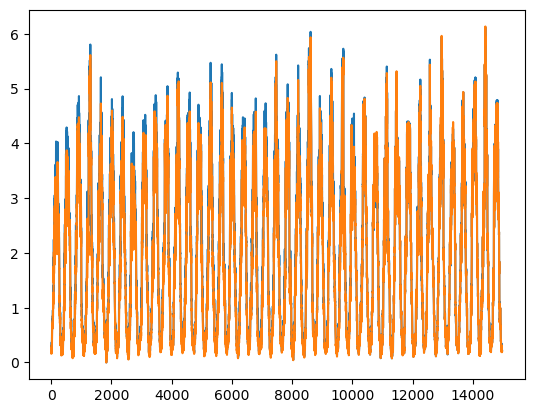

In [31]:
timeseries['evap_dwd'].plot()
timeseries['evap_era5_column'].plot()